# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (16)

**18/12/2023**

# `ALEJANDRO SÁNCHEZ MONZÓN`

## Clasificación con Redes Neuronales (Neural Network Clasification) 

---

In [2]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

In [4]:
# Cargar el dataset desde un archivo

df_aire_calidad = pd.read_csv('Calidad_aire_procesado.csv')

In [9]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

In [10]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [11]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [14]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

---

In [67]:
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.backend import clear_session

### **`Ejercicio 16.1`**

Saca la gráfica del ***Learning Curve*** con la estructura del último modelo analizado y creado en la sesión, definiendo y aplicando una función nueva considerando los siguientes puntos:  

- La función toma solamente una entrada para el hiperparámetro `epochs`. Utiliza la función para **dibujar tres diferentes curvas de aprendizaje** para distintos números de iteraciones (_`epochs`_: `{10, 30, 50}`). Después **explica los resultados y compara** las curvas obtenidas.  

- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla = 333`
- Filtra los resultados de cada modelo sin buscar el umbral óptimo (poniendo `umbral = 0.5`)
- (*Sugerencia*: No incluyas más de `15` puntos en el eje horizontal y empieza la gráfica con un mínimo de `100` muestras para los modelos que se van a ajustar)

In [68]:
# Solución
# Ejercicio 16.1
def curva_aprendizaje_16_1(epochs: int):
    clear_session()

    semilla_16_1 = 333
    random.seed(semilla_16_1)
    np.random.seed(semilla_16_1)
    tf.random.set_seed(semilla_16_1)

    num_samples_16_1 = np.linspace(100, X_train.shape[0]).astype(int)
    train_score_16_1 = np.zeros(num_samples_16_1.size)
    test_score_16_1 = np.zeros(num_samples_16_1.size)

    modelo_ks_16_1 = Sequential()
    modelo_ks_16_1.add(Input(shape=(X_train.shape[1],)))
    modelo_ks_16_1.add(Dense(100, activation='relu'))
    modelo_ks_16_1.add(Dense(200, activation='relu'))
    modelo_ks_16_1.add(Dense(100, activation='relu'))
    modelo_ks_16_1.add(Dense(1, activation='sigmoid'))
    modelo_ks_16_1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

    for i in range(num_samples_16_1.size):
        modelo_ks_16_1.fit(X_train[:num_samples_16_1[i]], y_train[:num_samples_16_1[i]], epochs=epochs, batch_size=100, verbose=0)

        y_pred_ks_train = modelo_ks_16_1.predict(X_train[:num_samples_16_1[i]])
        y_pred_train = np.where(y_pred_ks_train < 0.5, 0, 1)

        y_pred_ks_test = modelo_ks_16_1.predict(X_test)
        y_pred_test = np.where(y_pred_ks_test < 0.5, 0, 1)

        train_score_16_1[i] = accuracy_score(y_train[:num_samples_16_1[i]], y_pred_train)
        test_score_16_1[i] = accuracy_score(y_test, y_pred_test)

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score_16_1[-1]-test_score_16_1[-1])

    plt.figure(figsize=(20,6))
    plt.plot(num_samples_16_1, test_score_16_1, linewidth=3, label='Test Accuracy')
    plt.plot(num_samples_16_1, train_score_16_1, linewidth=3, label='Train Accuracy')
    plt.plot(num_samples_16_1[np.argmax(test_score_16_1)], max(test_score_16_1),
            marker='o', color = "red", label="Max Accuracy")
    plt.xticks(np.linspace(100, X_train.shape[0], 15).astype(int))
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()


308/308 [==============================] - 0s 2ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.08372226055545862


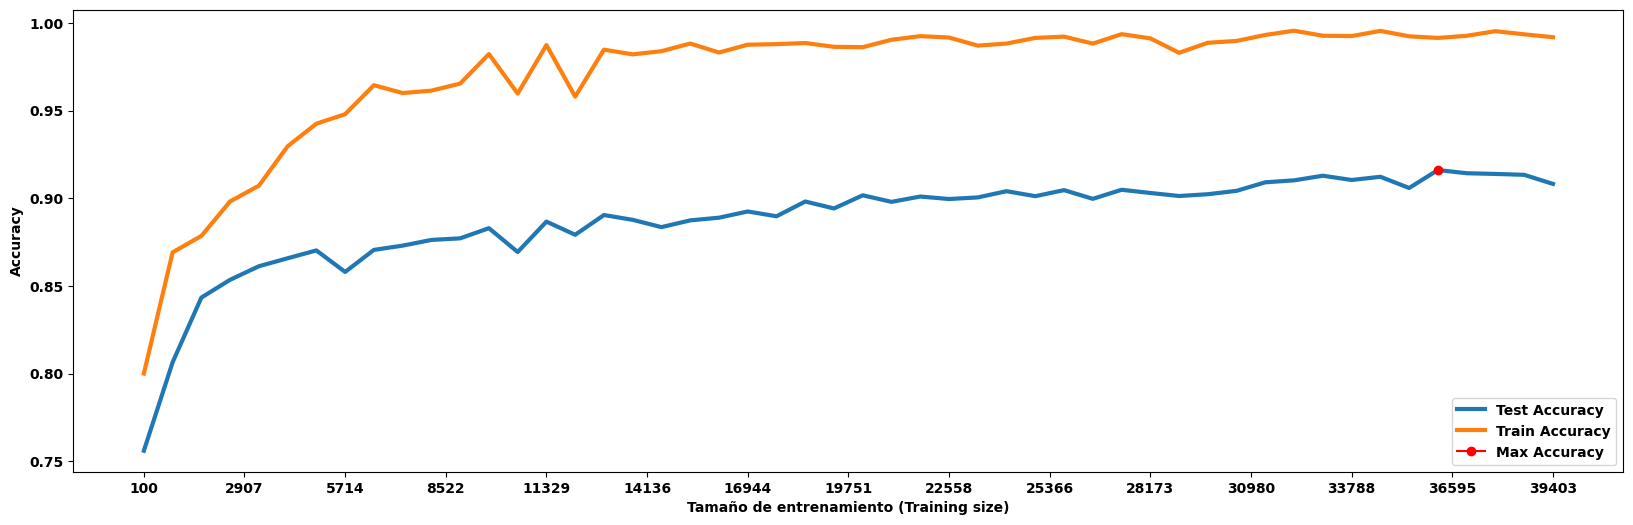

In [69]:
curva_aprendizaje_16_1(10)

308/308 [==============================] - 1s 3ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.08788447036026492


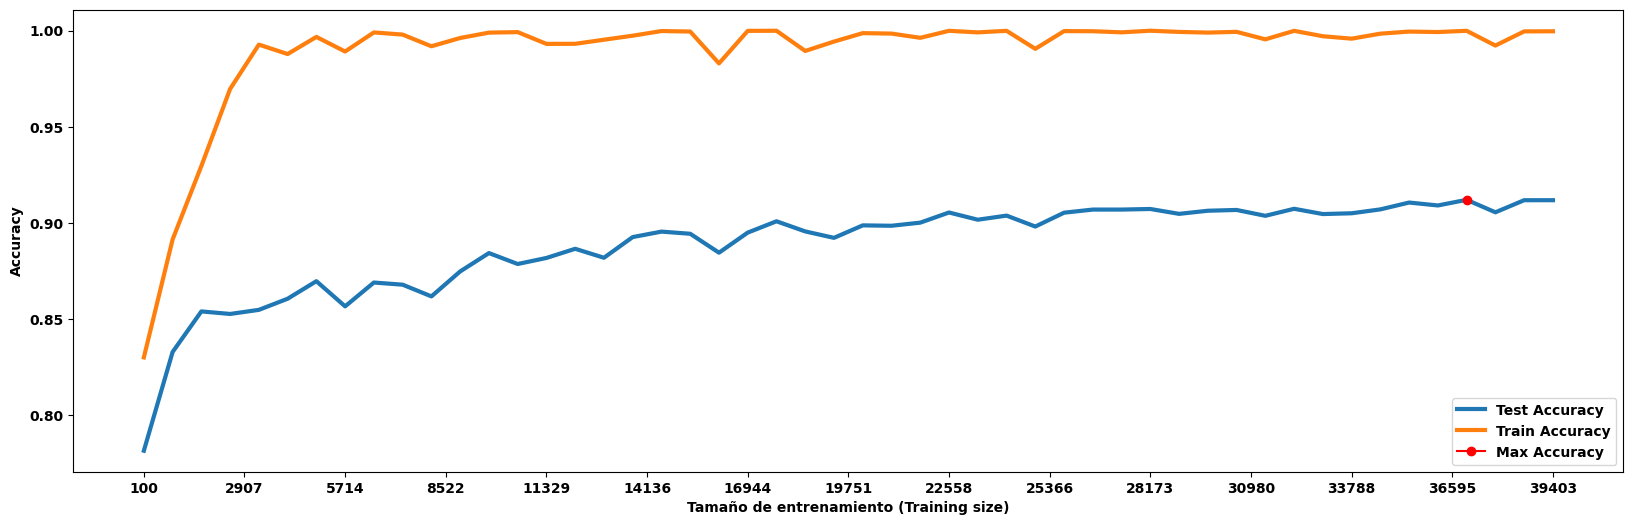

In [70]:
curva_aprendizaje_16_1(30)

308/308 [==============================] - 1s 2ms/step
La diferencia final del rendimiento del modelo entre training y test es=  0.08821439447771795


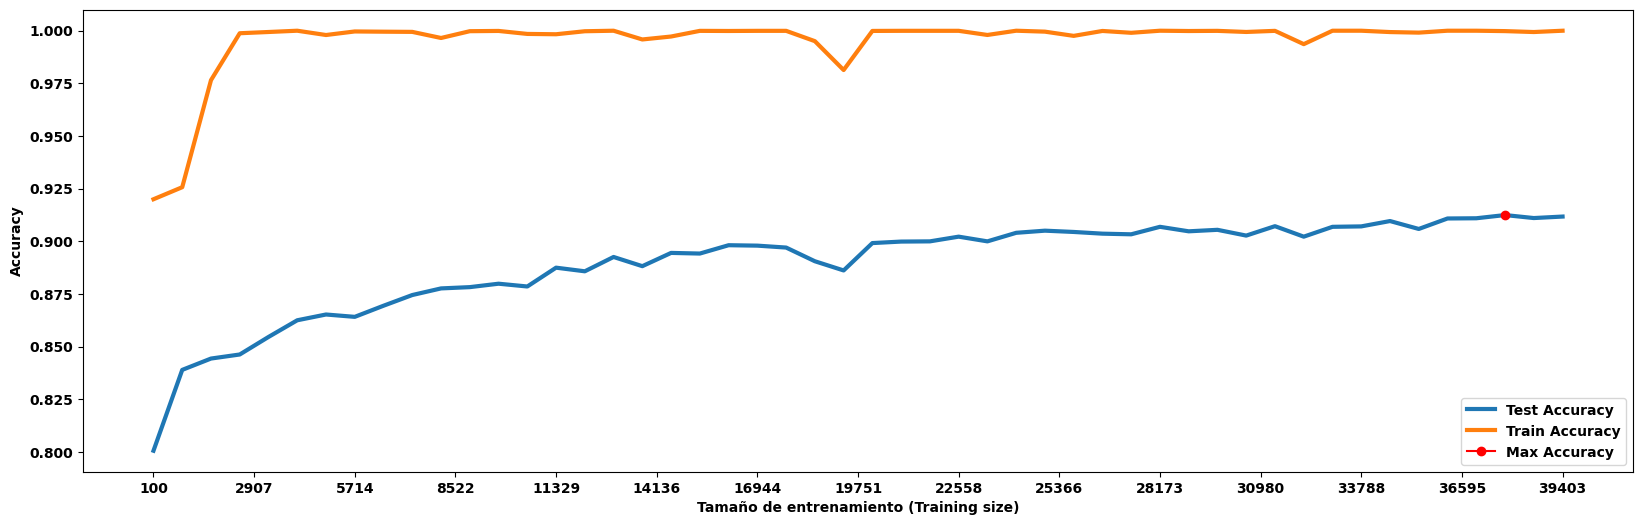

In [71]:
curva_aprendizaje_16_1(50)

> #### Explicación 16.1
> Para las 3 curvas de aprenzidaje de los 3 valores distintos de iteracción, podemos observar que la curva tiene un **comportamiento algo similar**. Para la gráfica del subconjunto de test, en las tres curvas, se presenta una tendencia ascendente, aunque nada muy sobresaliente. 
> Tambien podemos observar que en todas **el gap se reduce poco a poco**, pero aun les queda mucho por que las gráficas de cada curva **convergan**.
> **Ninguna** de las tres curvas **presenta un riesgo de overfitting**, no se puede ver ningun sobreajuste clato en ninguna de ellas, y tambien podemos observar que para las respectivas gráficas del subconjunto de test, los valores de **Accuracy** que presentan no son nada malos (en torno a **0.9**).
>
> En general son curvas de aprendizaje **muy parejas** en cuanto a forma, pero que no presentan una curva de aprendizaje excesivamente llamativa por ser buena. Sería necesario seguir analizando el modelo con más datos de entrenamiento para conocer como se desarrolla.

---

### **`Ejercicio 16.2`**

**`16.2.1`** Saca la gráfica de ***Complexity Curve*** con la estructura del último modelo analizado y creado en la sesión, considerando los siguientes puntos. Analiza la curva y **explica** qué valor sería mejor según este análisis para el número de las iteraciones:  

- Considera el siguiente rango para asignar al único hiperparámetro que se va a analizar en esta gráfica (número de iteraciones), usando las funciones de ___numpy___:
  - `epochs`: `{10,  20,  30,  40,  50,  60,  70,  80,  90, 100}`
- La curva muestra la evolución de `Accuracy` tanto para el conjunto de _training_ como para el dataset de _test_
- `semilla = 333`
- Filtra los resultados de cada modelo sin buscar el umbral óptimo (`umbral = 0.5`)
- (*Sugerencia*: No incluyas más de `15` puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para los modelos que se van a ajustar)


**`16.2.2`** Saca la gráfica de ***Complexity Curve*** y analiza los resultados al igual que el punto anterior (`16.2.1`), **excepto la métrica de clasificación**, considerando el siguiente punto:  

- La curva muestra la evolución de `AUC` en vez de _accuracy_, tanto para el conjunto de _training_ como para el dataset de _test_  

**`16.2.3`** Analizando los resultados de todos los puntos anteriores, **explica** cuál sería el número de iteraciones que finalmente sugieres para asignar **como el valor óptimo** de este hiperparámetro.  


308/308 [==============================] - 1s 2ms/step
El mejor valor de epochs podría ser = 70  que consigue un Accuracy = 0.92142929651812


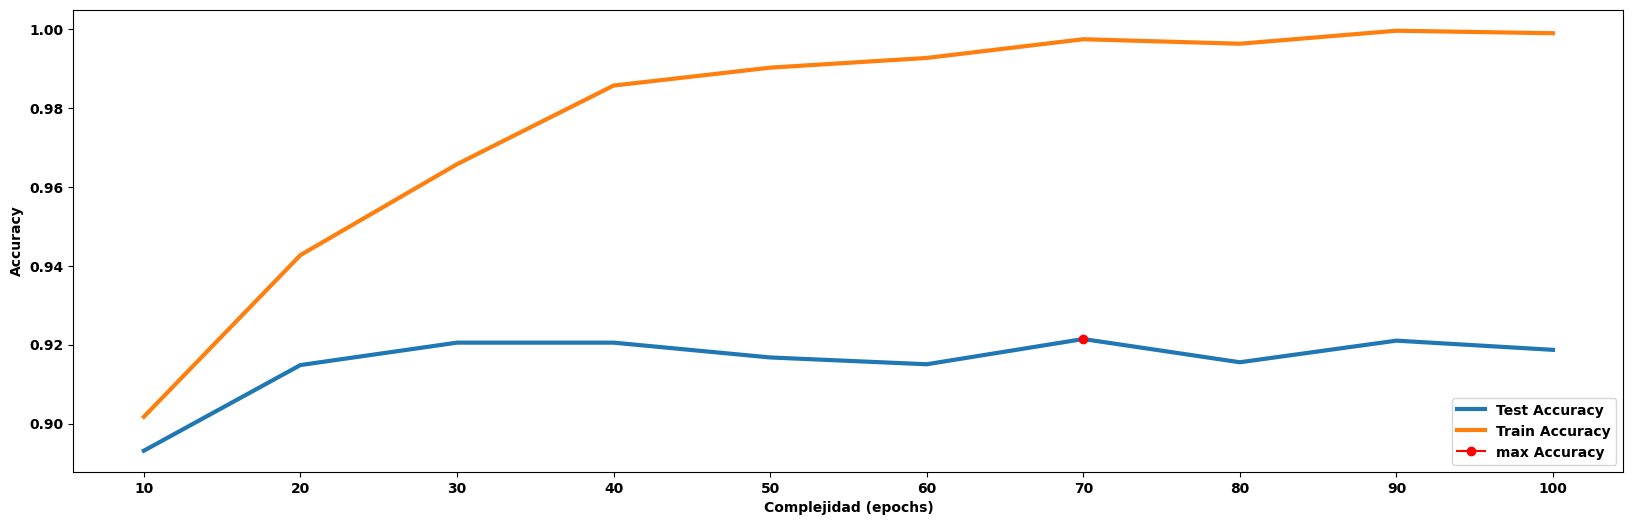

In [74]:
# Solución
# Ejercicio 16.2.1
clear_session()

semilla_16_2 = 333
random.seed(semilla_16_2)
np.random.seed(semilla_16_2)
tf.random.set_seed(semilla_16_2)

epochs_16_2 = np.arange(10, 101, 10)
train_score_16_2 = np.zeros(epochs_16_2.size)
test_score_16_2 = np.zeros(epochs_16_2.size)

modelo_ks_16_2 = Sequential()
modelo_ks_16_2.add(Input(shape=(X_train.shape[1],)))
modelo_ks_16_2.add(Dense(100, activation='relu'))
modelo_ks_16_2.add(Dense(200, activation='relu'))
modelo_ks_16_2.add(Dense(100, activation='relu'))
modelo_ks_16_2.add(Dense(1, activation='sigmoid'))
modelo_ks_16_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

for i in range(epochs_16_2.size):
    modelo_ks_16_2.fit(X_train, y_train, epochs=epochs_16_2[i], batch_size=100, verbose=0)

    y_pred_ks_train_16_2 = modelo_ks_16_2.predict(X_train)
    y_pred_train_16_2 = np.where(y_pred_ks_train_16_2 < 0.5, 0, 1)

    y_pred_ks_test_16_2 = modelo_ks_16_2.predict(X_test)
    y_pred_test_16_2 = np.where(y_pred_ks_test_16_2 < 0.5, 0, 1)

    train_score_16_2[i] = accuracy_score(y_train, y_pred_train_16_2)
    test_score_16_2[i] = accuracy_score(y_test, y_pred_test_16_2)

print("El mejor valor de epochs podría ser =", epochs_16_2[np.argmax(test_score_16_2)],
      " que consigue un Accuracy =", max(test_score_16_2))

plt.figure(figsize=(20,6))
plt.plot(epochs_16_2, test_score_16_2, linewidth=3, label='Test Accuracy')
plt.plot(epochs_16_2, train_score_16_2, linewidth=3, label='Train Accuracy')
plt.plot(epochs_16_2[np.argmax(test_score_16_2)], max(test_score_16_2),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(epochs_16_2)
plt.xlabel('Complejidad (epochs)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

> #### Explicación 16.2.1
> En términos generales, todos los rangos de epochs que hemos analizado en la curva presentan métricas no muy distintas, con valores de accuracy que varían en menor de 0.03 puntos.
>
> El valor de epochs que presenta las mejores métricas de Accuracy es **70**, con un valor de Accuracy de **0.92** aproximadamente. Aunque se encuentra en un rango muy parecido junto a valores de epochs como 30 o 40.

308/308 [==============================] - 1s 4ms/step
El mejor valor de epochs podría ser = 70  que consigue un AUC = 0.8933846882919945


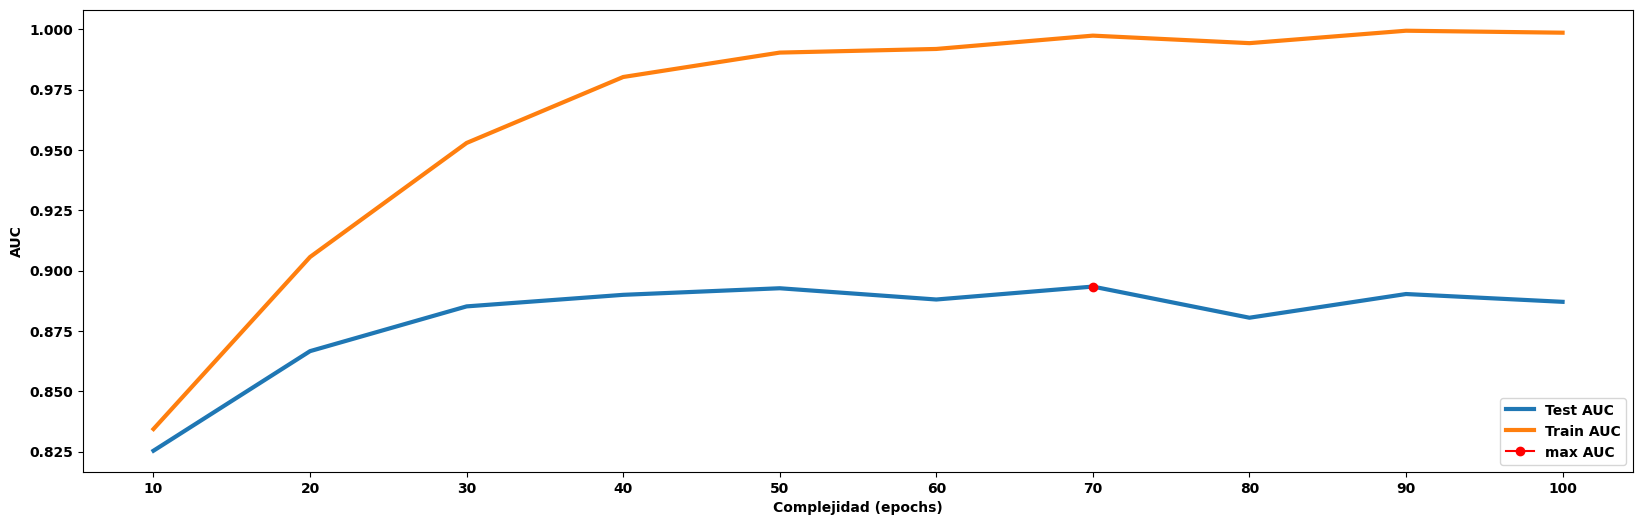

In [75]:
# Solución
# Ejercicio 16.2.2
clear_session()

semilla_16_2_2 = 333
random.seed(semilla_16_2_2)
np.random.seed(semilla_16_2_2)
tf.random.set_seed(semilla_16_2_2)

epochs_16_2_2 = np.arange(10, 101, 10)
train_score_16_2_2 = np.zeros(epochs_16_2_2.size)
test_score_16_2_2 = np.zeros(epochs_16_2_2.size)

modelo_ks_16_2_2 = Sequential()
modelo_ks_16_2_2.add(Input(shape=(X_train.shape[1],)))
modelo_ks_16_2_2.add(Dense(100, activation='relu'))
modelo_ks_16_2_2.add(Dense(200, activation='relu'))
modelo_ks_16_2_2.add(Dense(100, activation='relu'))
modelo_ks_16_2_2.add(Dense(1, activation='sigmoid'))
modelo_ks_16_2_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy', 'AUC'])

for i in range(epochs_16_2_2.size):
    modelo_ks_16_2_2.fit(X_train, y_train, epochs=epochs_16_2_2[i], batch_size=100, verbose=0)

    y_pred_ks_train = modelo_ks_16_2_2.predict(X_train)
    y_pred_train = np.where(y_pred_ks_train < 0.5, 0, 1)

    y_pred_ks_test = modelo_ks_16_2_2.predict(X_test)
    y_pred_test = np.where(y_pred_ks_test < 0.5, 0, 1)

    train_score_16_2_2[i] = roc_auc_score(y_train, y_pred_train)
    test_score_16_2_2[i] = roc_auc_score(y_test, y_pred_test)

print("El mejor valor de epochs podría ser =", epochs_16_2_2[np.argmax(test_score_16_2_2)],
      " que consigue un AUC =", max(test_score_16_2_2))

plt.figure(figsize=(20,6))
plt.plot(epochs_16_2_2, test_score_16_2_2, linewidth=3, label='Test AUC')
plt.plot(epochs_16_2_2, train_score_16_2_2, linewidth=3, label='Train AUC')
plt.plot(epochs_16_2_2[np.argmax(test_score_16_2_2)], max(test_score_16_2_2),
        marker='o', color = "red", label="max AUC")
plt.xticks(epochs_16_2_2)
plt.xlabel('Complejidad (epochs)')
plt.ylabel('AUC')
plt.legend(loc = 'lower right')
plt.show()

> #### Explicación 16.2.2
> En general, los valores de la curva de complejidad para epochs varían en un máximo de unos 0.08 puntos, teniendo por lo general valores de la métria de AUC muy parejas.
>
> Destacamos el valor **70** de epochs, que presenta una métrica de AUC con un valor de **0.89**. Tabién destacamos otros valores de epoch que tienen vaores para la métrica parecida, como 40 o 90.

> #### Explicación 16.2.3
> Para ambas curvas, tanto para metricas como AUC o Accuracy, podemos observar que el valor de **epochs** marcado como "el mejor" se encuentra el **70**. Con un **Accuracy de 0.92** y un **AUC de 0.89**. Estos valores son bastante buenos, pero podemos observar tambien que otros valores de epochs como 30 y 40 presentan un Accuracy parecido, y valores como 50, tambien presentan valores de AUC parecidos.
>
> Dicho razonamiento nos lleva a pensar que el valor de epoch "mejor" es 70. Pero quizá, si analizamos otros aspectos como la **eficiencia** y los **recursos** a consumir, nos damos cuenta de que nos podemos decantar por valores de epoch más bajos, pero con métricas ciertamente parecidas.
>
> Personalmente sugiero como valor del **hiperparámetro óptimo 70**, puesto que es el que presenta mejores métricas en términos generales.